## About Dataset

## Context: 


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:



## Context:
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content



Attribute Information:

1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Dataset :-
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Importing Libraries

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## EDA

In [4]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


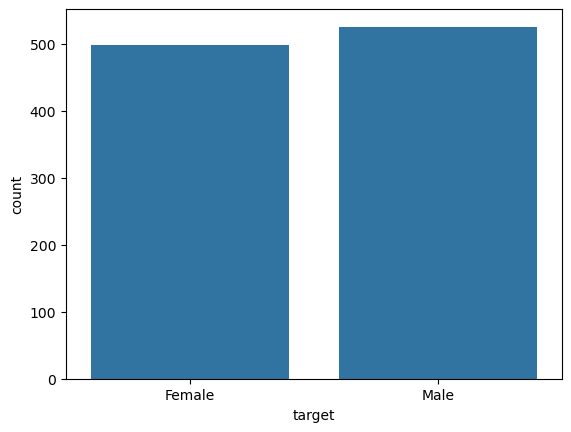

In [6]:
sns.countplot(data = heart_df, x = 'target')
plt.xticks(ticks=[0,1], labels= ['Female', 'Male'])
plt.show()

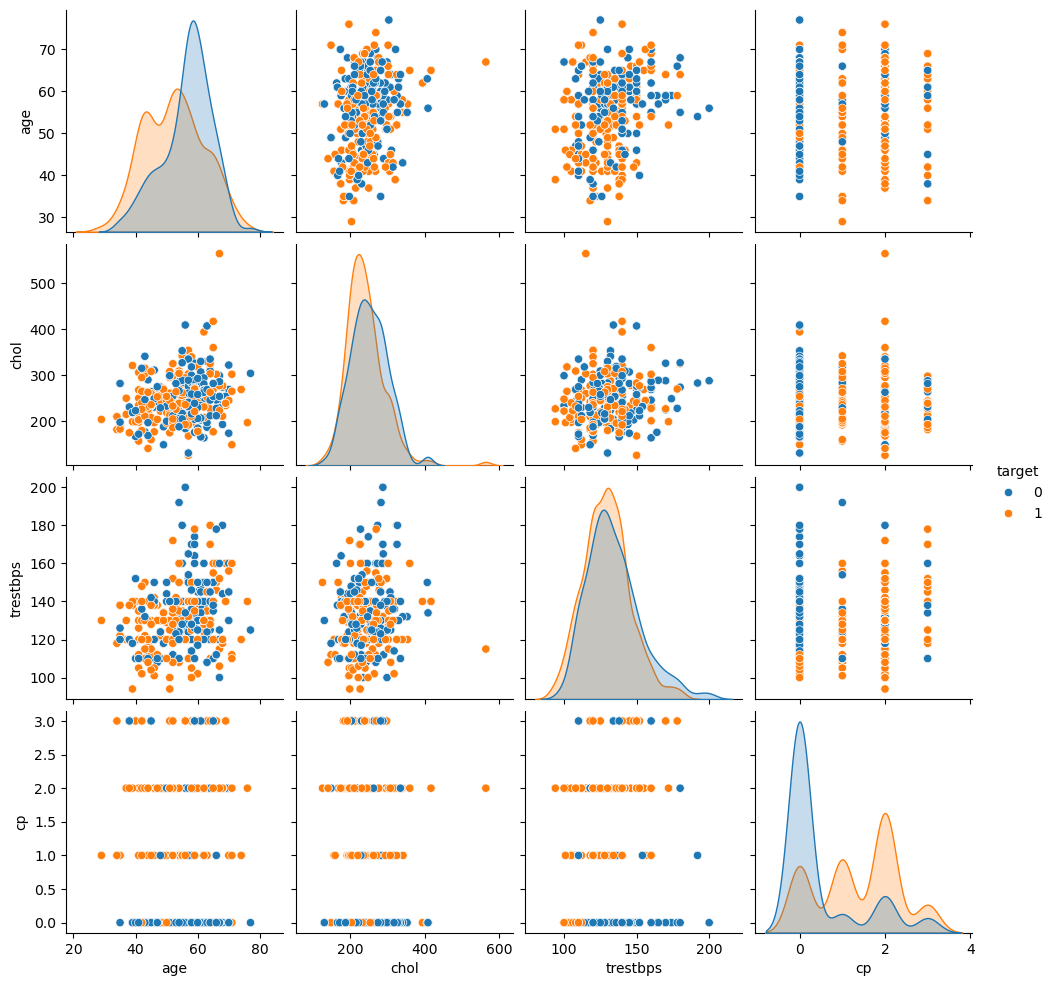

In [7]:
selected_features = heart_df[['age', 'chol','trestbps', 'cp', 'target']]
sns.pairplot(data = selected_features, hue='target')
plt.show()

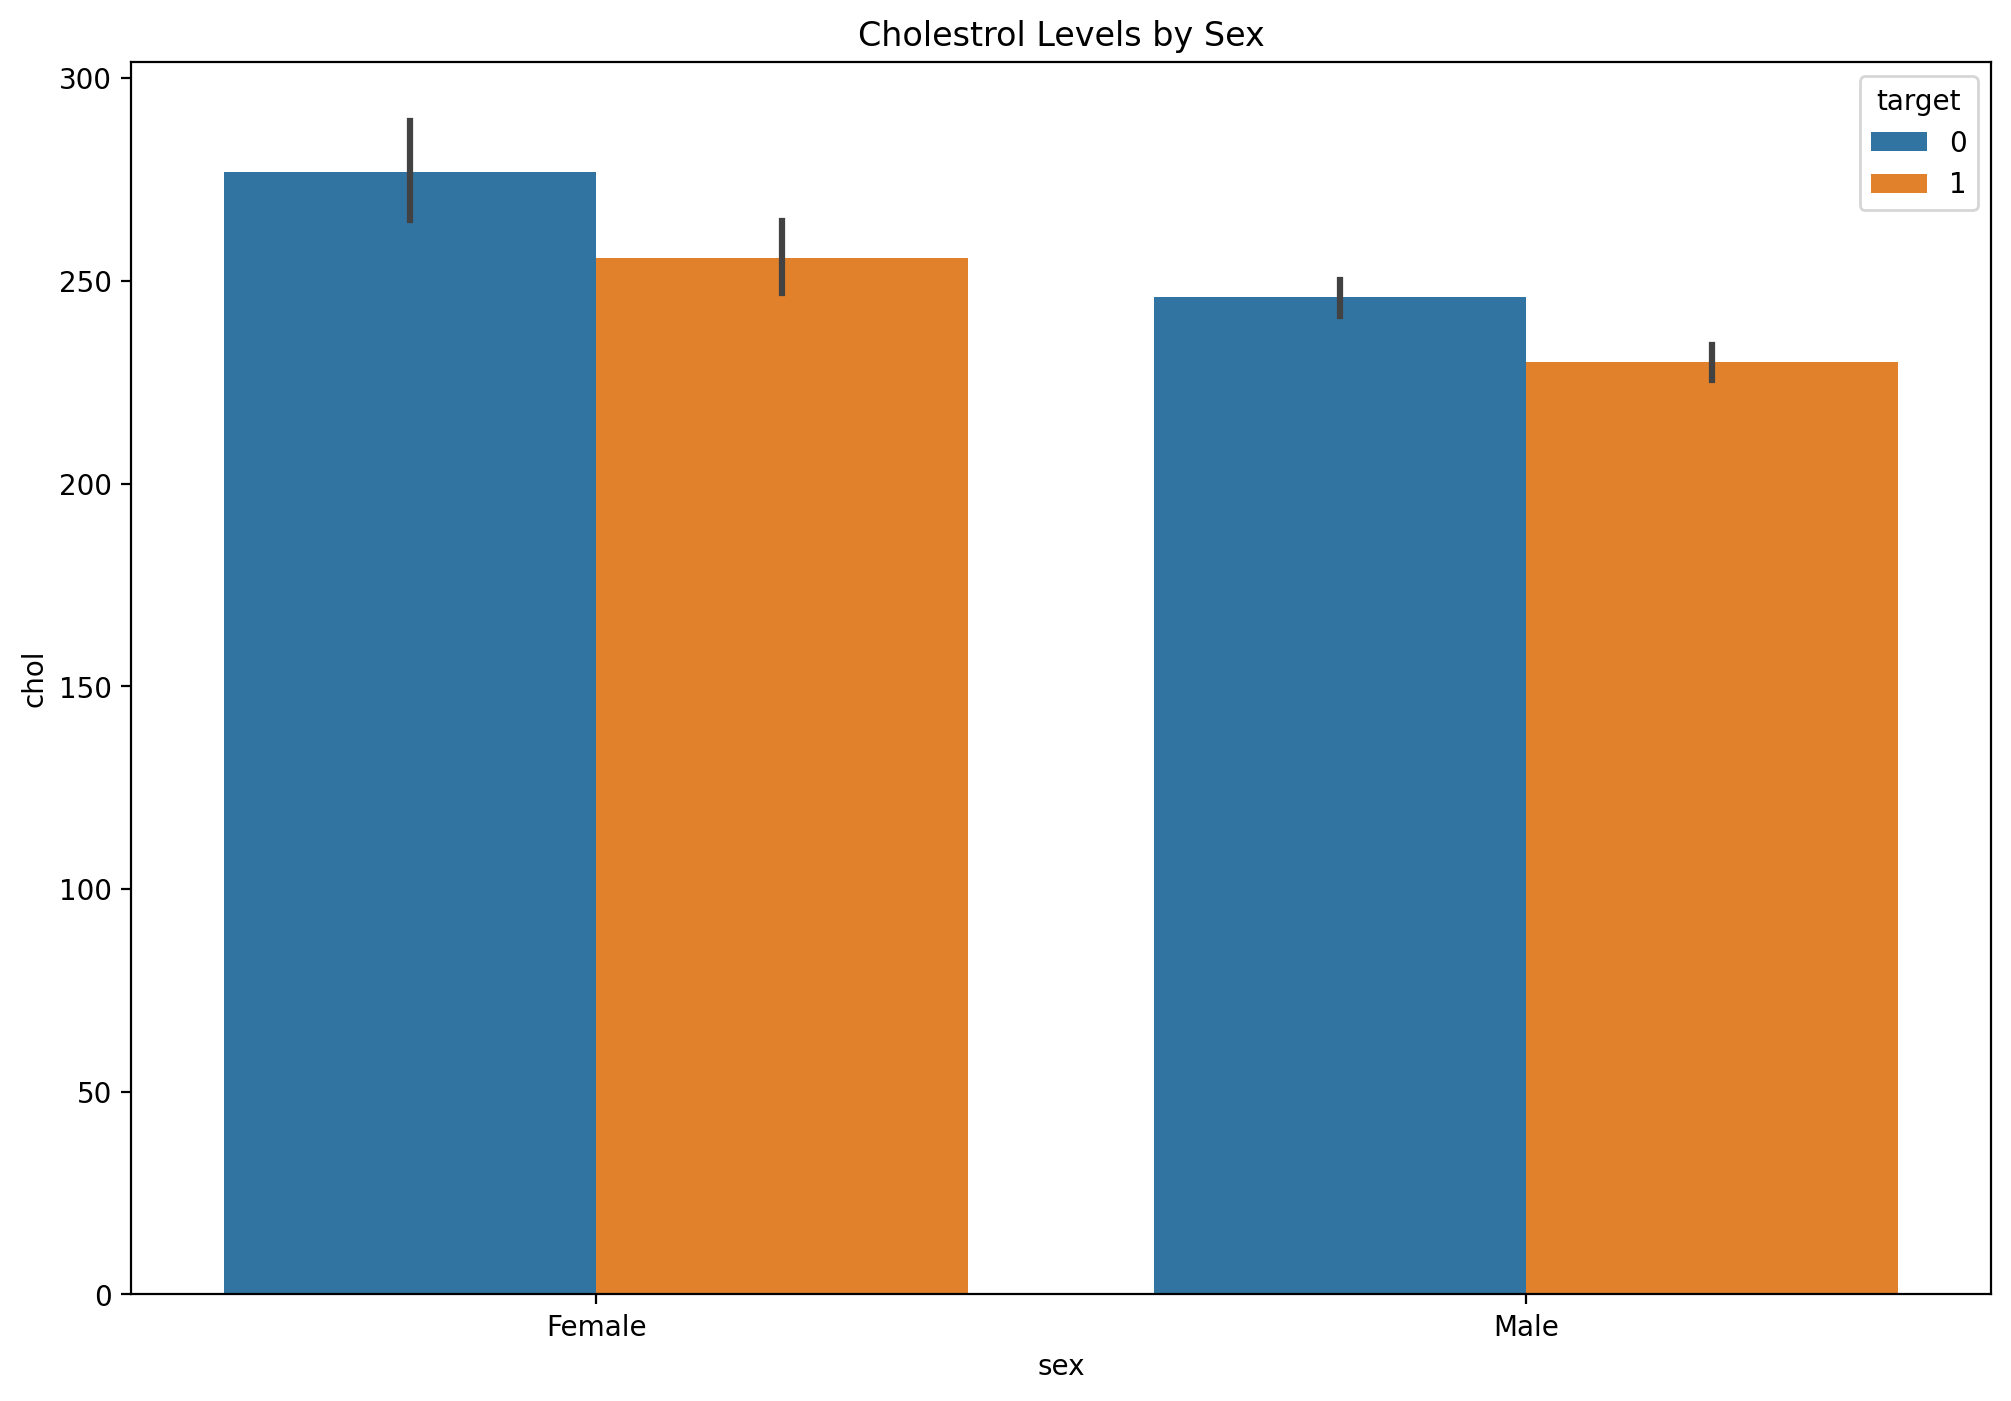

In [8]:
plt.figure(figsize=(12,8), dpi = 200)
plt.title('Cholestrol Levels by Sex')
sns.barplot(heart_df, x = 'sex', y ='chol', hue='target')
plt.xticks(ticks=[0,1], labels= ['Female', 'Male']);

In [9]:
matrix = heart_df.corr()
matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


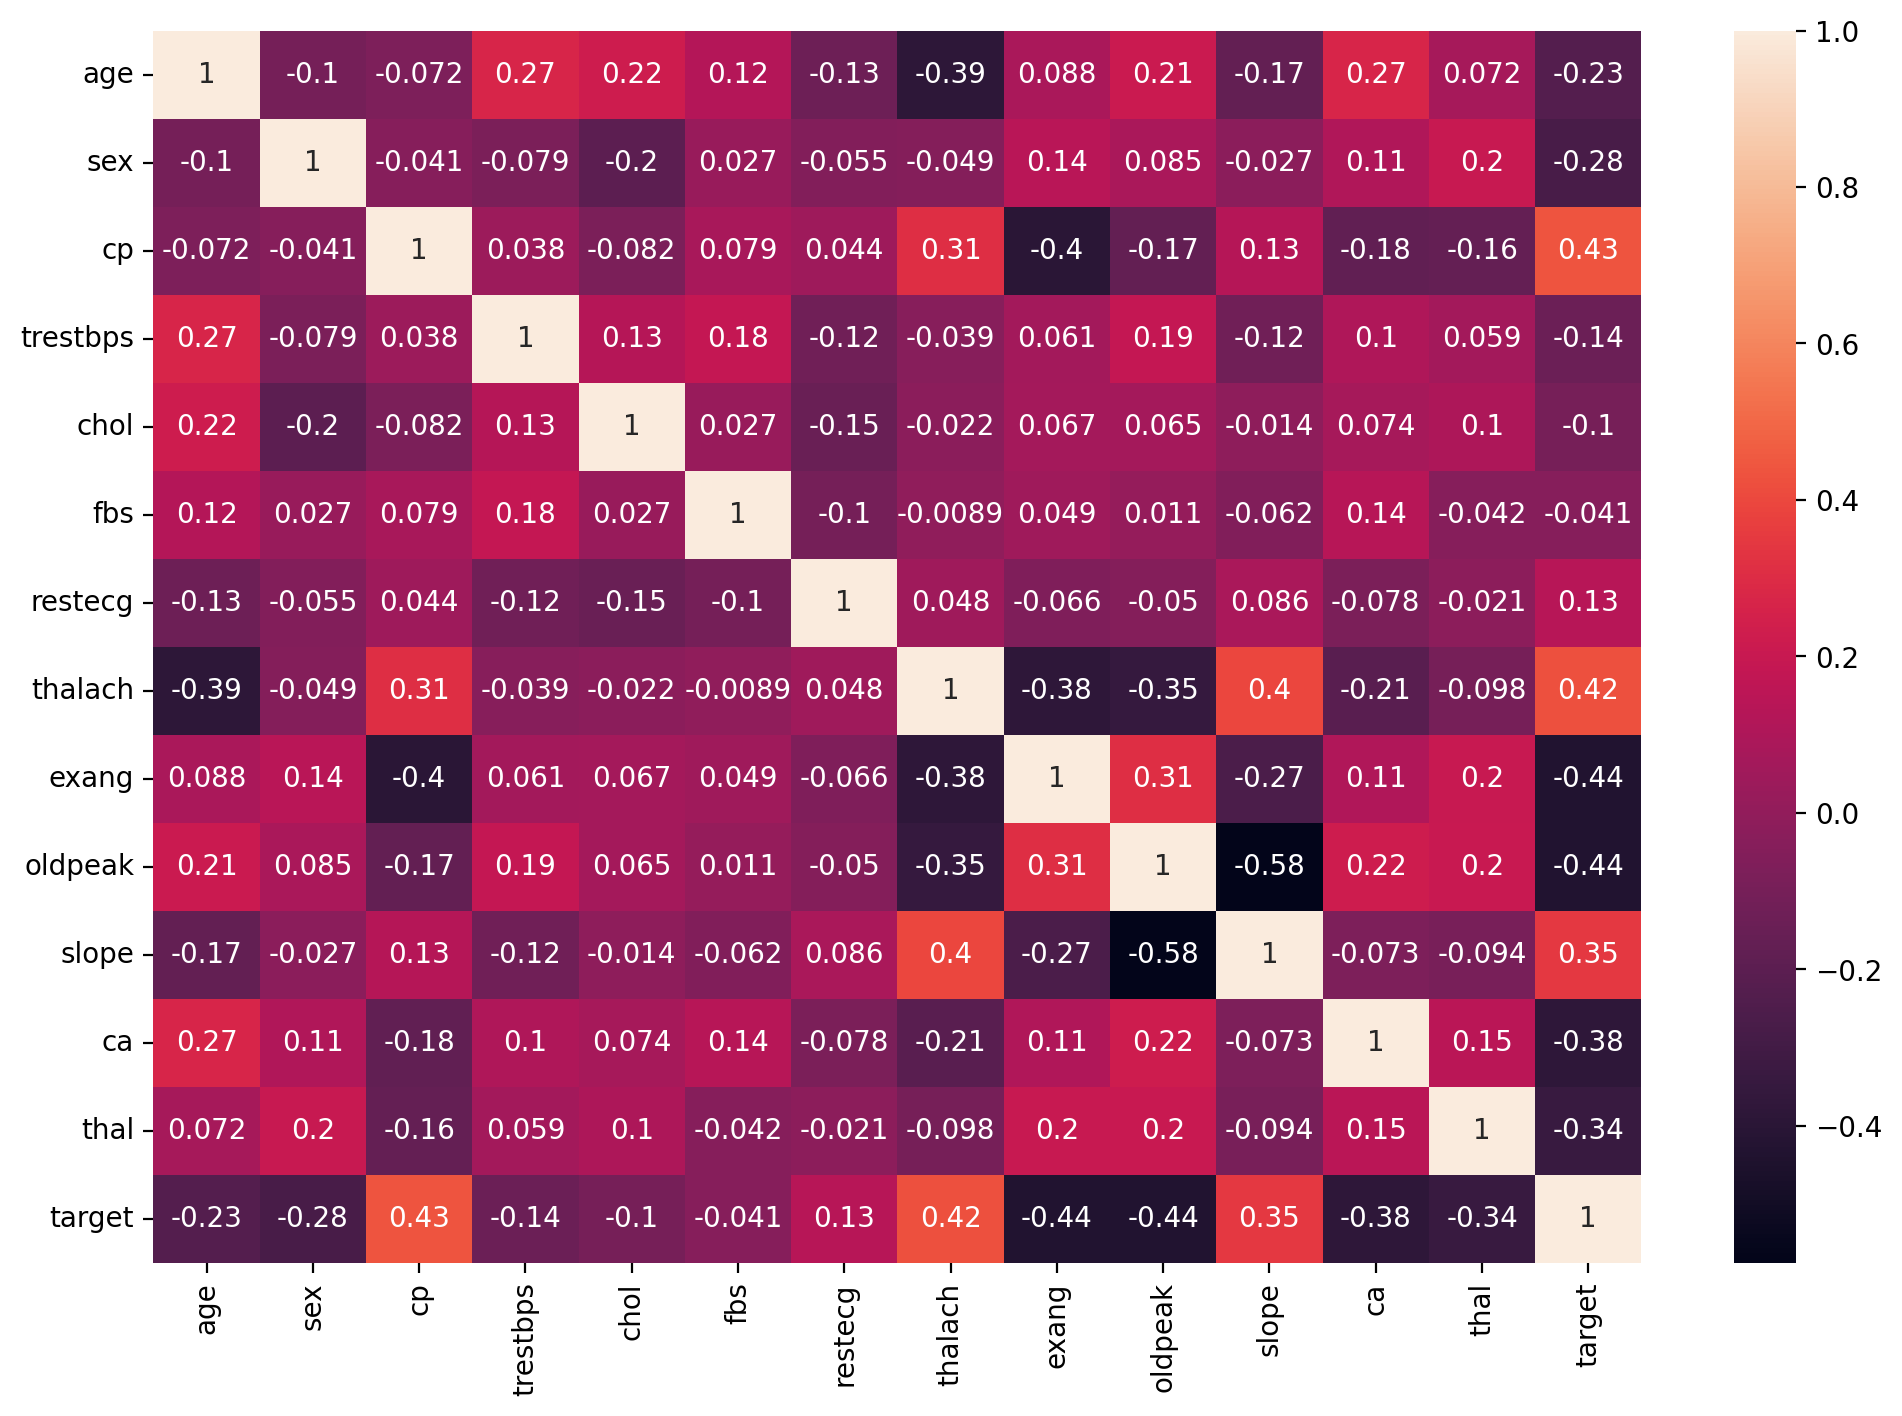

In [10]:
plt.figure(figsize=(12,8), dpi = 200)
sns.heatmap(matrix, annot = True)
plt.xticks(rotation = 90)
plt.show()

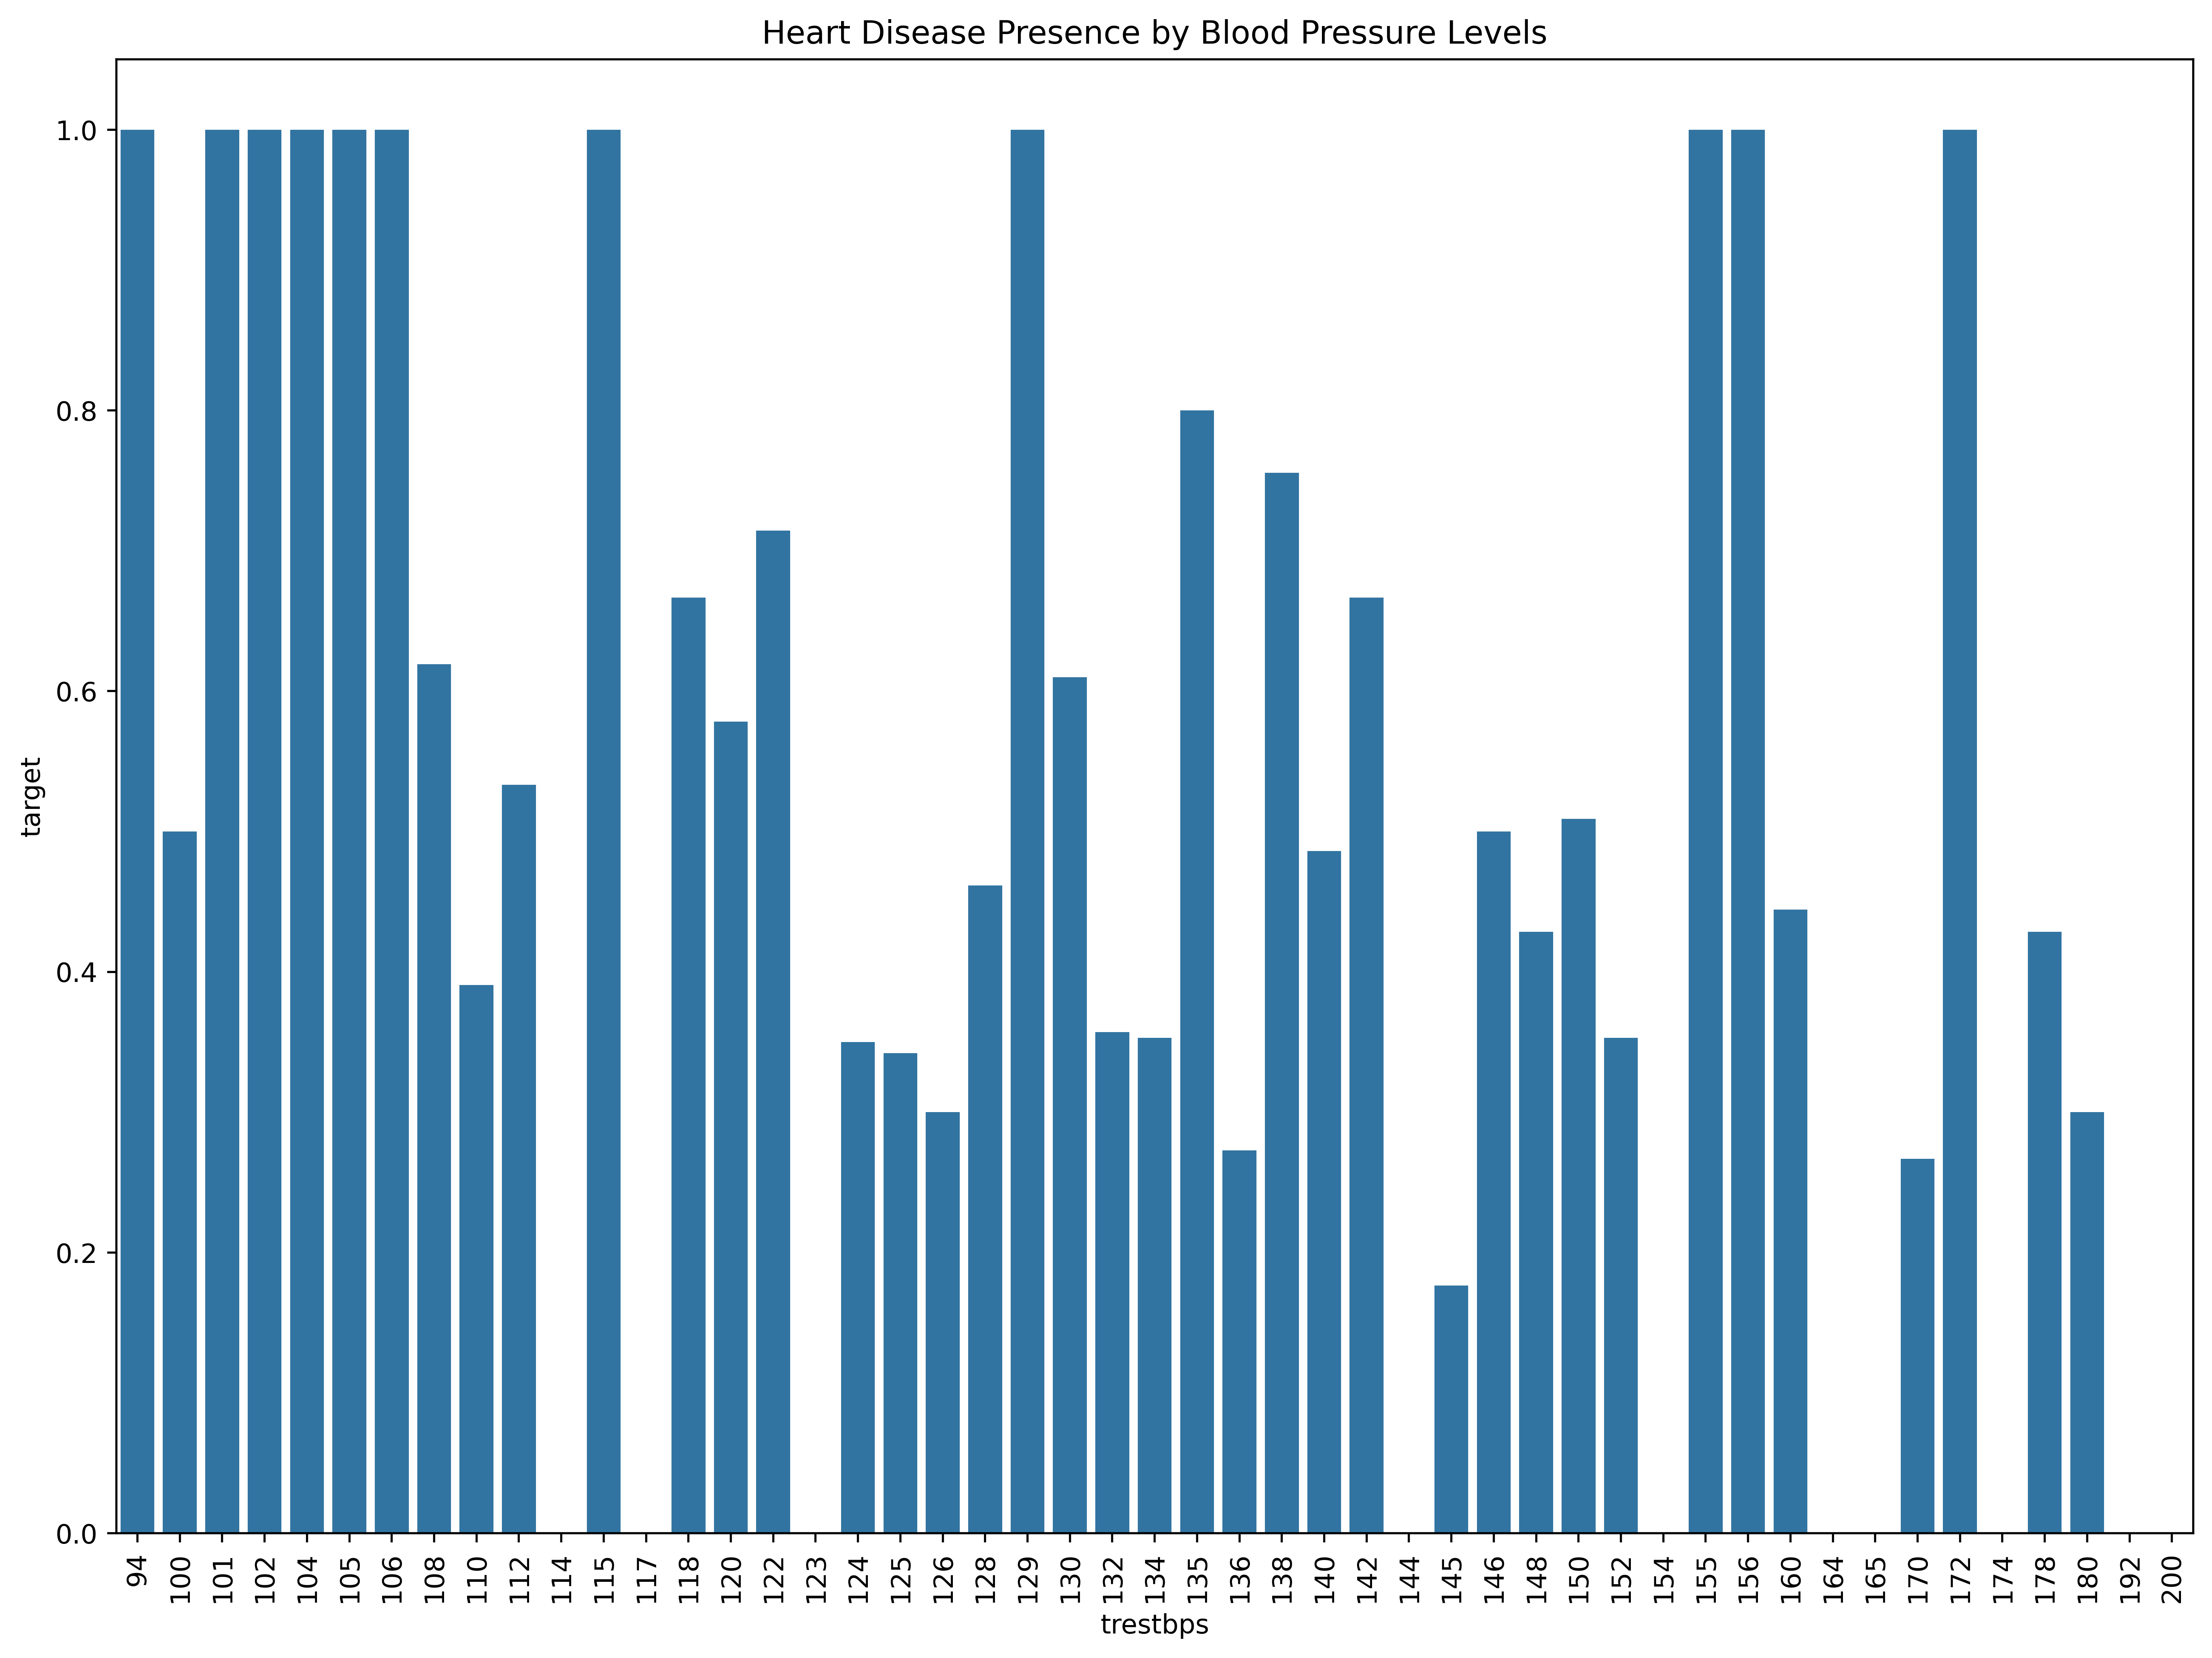

In [11]:
plt.figure(figsize=(14,10), dpi = 500)
plt.title("Heart Disease Presence by Blood Pressure Levels")
sns.barplot(heart_df, x = 'trestbps', y = 'target', errorbar=None )
plt.xticks(rotation = 90)
plt.show()

## Train | Test Split

In [12]:
X = heart_df.drop('target', axis = 1)
y = heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test= scaler.fit_transform(X_test)

## Logistic Regression

In [15]:
logistic_model = LogisticRegression()

In [16]:
logistic_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [17]:
logistic_model.coef_

array([[-0.10388549, -0.71894839,  0.92112855, -0.34834101, -0.22843148,
        -0.1150318 ,  0.20073372,  0.47346564, -0.39975976, -0.53777043,
         0.38094423, -0.76439199, -0.53170599]])

In [18]:
y_pred = logistic_model.predict(scaled_X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.8682926829268293

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       106
           1       0.82      0.93      0.87        99

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



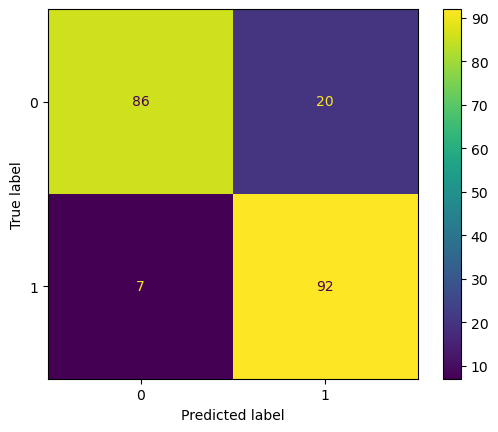

In [21]:
my_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(my_matrix).plot()



# KNN Model

In [22]:
X = heart_df.drop('target', axis = 1)
y = heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
knn =  KNeighborsClassifier()

In [25]:
operations = [('scaler',scaler),('knn',knn)]

In [26]:
pipe = Pipeline(operations)

In [27]:
k_values = list(range(1,15))

In [28]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [29]:
parameter_grid = {
    'knn__n_neighbors': k_values
}
# chosen_string_name + two underscore + parameter_key_name

In [30]:
cv_classifier = GridSearchCV(pipe, param_grid=parameter_grid, cv = 5, scoring = 'accuracy')

In [31]:
cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             scoring='accuracy')

In [32]:
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [33]:
knn_final_model = KNeighborsClassifier(n_neighbors=1)
scaler = StandardScaler()
operations = [('scaler',scaler),('knn',knn_final_model)]
pipe = Pipeline(operations)

In [34]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [35]:
y_prediction = pipe.predict(X_test)
accuracy_score(y_test, y_prediction)

1.0

In [36]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



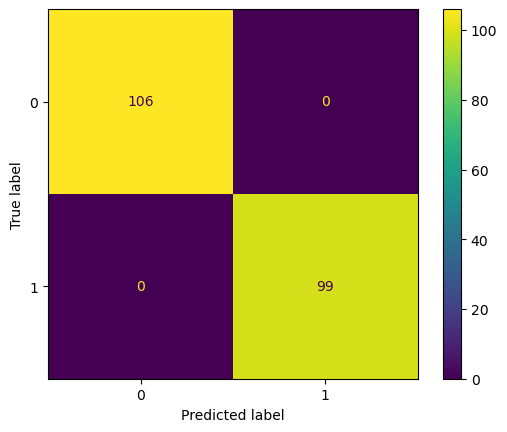

In [37]:
knn_matrix = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(knn_matrix).plot()

# Random Forest

In [38]:
X = heart_df.drop('target', axis = 1)
y = heart_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [39]:
rf_model = RandomForestClassifier()

In [40]:
rf_param = {
    'n_estimators': [10,50,1100,200],
    'max_features':[2,3,4,5],
    'bootstrap':[True, False],
    'oob_score':[True, False]
}

In [41]:
grid = GridSearchCV(rf_model, rf_param)

In [42]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 1100, 200],
                         'oob_score': [True, False]})

In [43]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 50, 'oob_score': True}

In [44]:
rf_prediction = grid.predict(X_test)

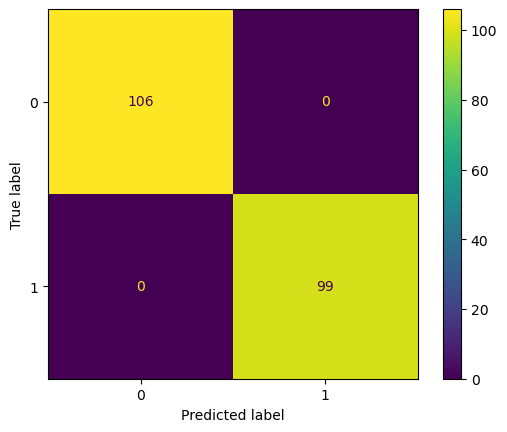

In [45]:
rf_matrix = confusion_matrix(y_test, rf_prediction)
ConfusionMatrixDisplay(rf_matrix).plot()

In [46]:
confusion_matrix(y_test, rf_prediction)

array([[106,   0],
       [  0,  99]], dtype=int64)

In [47]:
print(classification_report(y_test, rf_prediction))
accuracy_score(y_test, rf_prediction)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        99

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



1.0

In [48]:
comp_score ={
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy':[0.86, 1.0, 1.0 ],
    'Precision': [ 0.92, 1.00, 1.00],
    'Recall':[0.81, 1.00, 1.00],
    'F1 Score':[0.86, 1.00, 1.00]
}
pd.DataFrame(comp_score)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.86,0.92,0.81,0.86
1,KNN,1.00,1.00,1.00,1.00
2,Random Forest,1.00,1.00,1.00,1.00
